## 🏅 Olympic Medal Winner Prediction

Given *data about Olympic athletes*, let's try to predict whether a given competitor will be a **medal winner** or not.

We will use a TensorFlow ANN to make our predictions.

Data source: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
tf.random.set_seed(100)

In [3]:
data = pd.read_csv('archive/athlete_events.csv')
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


### Create Labels

In [5]:
data['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [6]:
data['Medal'] = data['Medal'].apply(lambda x: 1 if str(x) != 'nan' else 0)

In [7]:
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,0


### Cleaning

In [8]:
data = data.drop(['ID', 'Name', 'Games', 'Team'], axis=1)

In [9]:
data.isna().mean()

Sex       0.000000
Age       0.034944
Height    0.221938
Weight    0.231912
NOC       0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
Medal     0.000000
dtype: float64

In [10]:
data.groupby(['Medal', 'Sex'])['Age'].apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)

0         21.0
1         21.0
2         25.0
3         25.0
4         27.0
          ... 
271111    29.0
271112    21.0
271113    27.0
271114    31.0
271115    28.0
Name: Age, Length: 271116, dtype: float64

In [11]:
for column in ['Age', 'Height', 'Weight']:
    data[column] = data.groupby(['Medal', 'Sex'])[column].apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)

In [12]:
print("Total missing values: ", data.isna().sum().sum())

Total missing values:  0


### Encoding

In [13]:
data

,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal
0,M,21.0,185.0,82.0,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,M,21.0,185.0,82.0,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,M,25.0,185.0,82.0,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,M,25.0,185.0,82.0,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,F,27.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...
271111,M,29.0,175.0,64.0,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
271112,M,21.0,175.0,70.0,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,M,27.0,197.0,93.0,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,M,31.0,197.0,93.0,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,0


In [14]:
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Sex': 2, 'NOC': 230, 'Season': 2, 'City': 42, 'Sport': 66, 'Event': 765}

In [15]:
def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [16]:
data = binary_encode(
    data,
    columns = ['Sex', 'Season'],
    positive_values = ['M', 'Summer']
)

data = onehot_encode(
    data,
    columns = ['NOC', 'City', 'Sport', 'Event'],
    prefixes = ['N', 'C', 'S', 'E']
)

In [17]:
data

,Sex,Age,Height,Weight,Year,Season,Medal,N_AFG,N_AHO,N_ALB,...,"E_Wrestling Men's Super-Heavyweight, Greco-Roman","E_Wrestling Men's Unlimited Class, Greco-Roman","E_Wrestling Men's Welterweight, Freestyle","E_Wrestling Men's Welterweight, Greco-Roman","E_Wrestling Women's Featherweight, Freestyle","E_Wrestling Women's Flyweight, Freestyle","E_Wrestling Women's Heavyweight, Freestyle","E_Wrestling Women's Light-Heavyweight, Freestyle","E_Wrestling Women's Lightweight, Freestyle","E_Wrestling Women's Middleweight, Freestyle"
0,1,21.0,185.0,82.0,1992,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,21.0,185.0,82.0,2012,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,25.0,185.0,82.0,1920,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,25.0,185.0,82.0,1900,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,27.0,185.0,82.0,1988,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,1,29.0,175.0,64.0,1976,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
271112,1,21.0,175.0,70.0,2014,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
271113,1,27.0,197.0,93.0,2014,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
271114,1,31.0,197.0,93.0,1998,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
print("Remaining non-numeric columns: ", len(data.select_dtypes('object').columns))

Remaining non-numeric columns:  0


### Visualize correlations

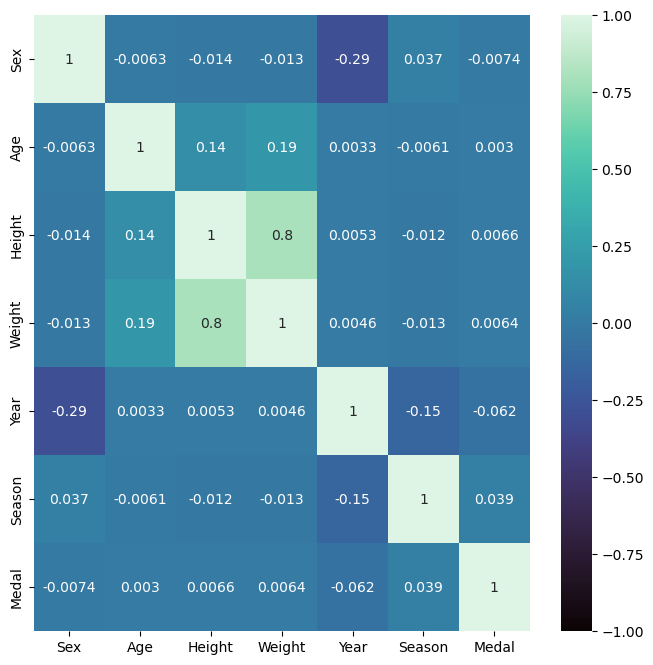

In [19]:
corr = data.loc[:, :'Medal'].corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, cmap='mako')
plt.show()

### Splitting/Scaling

In [20]:
data

,Sex,Age,Height,Weight,Year,Season,Medal,N_AFG,N_AHO,N_ALB,...,"E_Wrestling Men's Super-Heavyweight, Greco-Roman","E_Wrestling Men's Unlimited Class, Greco-Roman","E_Wrestling Men's Welterweight, Freestyle","E_Wrestling Men's Welterweight, Greco-Roman","E_Wrestling Women's Featherweight, Freestyle","E_Wrestling Women's Flyweight, Freestyle","E_Wrestling Women's Heavyweight, Freestyle","E_Wrestling Women's Light-Heavyweight, Freestyle","E_Wrestling Women's Lightweight, Freestyle","E_Wrestling Women's Middleweight, Freestyle"
0,1,21.0,185.0,82.0,1992,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,21.0,185.0,82.0,2012,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,25.0,185.0,82.0,1920,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,25.0,185.0,82.0,1900,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,27.0,185.0,82.0,1988,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,1,29.0,175.0,64.0,1976,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
271112,1,21.0,175.0,70.0,2014,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
271113,1,27.0,197.0,93.0,2014,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
271114,1,31.0,197.0,93.0,1998,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
y = data['Medal'].copy()
X = data.drop('Medal', axis=1).copy()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Training

In [25]:
X.shape

(271116, 1109)

In [30]:
print("Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%".format(y.mean() * 100, (1-y.mean())*100))

Class Distribution (Positive to Negative): 14.7% / 85.3%


In [31]:
inputs = tf.keras.Input(shape=(X.shape[1], ))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

2025-12-20 13:08:39.799259: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 673491264 exceeds 10% of free system memory.


Epoch 1/100
4729/4745 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8527 - auc: 0.7427 - loss: 0.3743

2025-12-20 13:09:00.794983: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 168377252 exceeds 10% of free system memory.


4745/4745 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.8660 - auc: 0.7862 - loss: 0.3445 - val_accuracy: 0.8832 - val_auc: 0.8312 - val_loss: 0.3059
Epoch 2/100
4745/4745 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8876 - auc: 0.8502 - loss: 0.2922 - val_accuracy: 0.8934 - val_auc: 0.8565 - val_loss: 0.2825
Epoch 3/100
4745/4745 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8996 - auc: 0.8808 - loss: 0.2622 - val_accuracy: 0.9013 - val_auc: 0.8729 - val_loss: 0.2669
Epoch 4/100
4745/4745 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9083 - auc: 0.9012 - loss: 0.2398 - val_accuracy: 0.9065 - val_auc: 0.8809 - val_loss: 0.2584
Epoch 5/100
4745/4745 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9145 - auc: 0.9161 - loss: 0.2226 - val_accuracy: 0.9100 - val_auc: 0.8837 - val_loss: 0.2574
Epoch 6/100
4745/4745 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9190 - auc: 0.9266 - loss: 0.2095 - val_accuracy: 0.9105 - val_auc: 0.8871 - val_loss: 0.2574
Epoch 7/100
4745/4745 ━━━━━━

### Results

In [32]:
model.evaluate(X_test, y_test)

  40/2542 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8964 - auc: 0.9115 - loss: 0.2546

2025-12-20 13:21:02.367351: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 360802060 exceeds 10% of free system memory.


2542/2542 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9087 - auc: 0.8846 - loss: 0.2635


[0.26350435614585876, 0.9087231755256653, 0.8845896124839783]

In [33]:
y_true = np.array(y_test)
y_pred = np.squeeze(np.array(model.predict(X_test) >= 0.5, dtype=int))

  65/2542 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

2025-12-20 13:23:27.155216: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 360802060 exceeds 10% of free system memory.


2542/2542 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [34]:
print("Classification Report:\n\n", classification_report(y_true, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.92      0.98      0.95     69391
           1       0.80      0.50      0.62     11944

    accuracy                           0.91     81335
   macro avg       0.86      0.74      0.78     81335
weighted avg       0.90      0.91      0.90     81335



In [36]:
print("Confusion Matrix:\n\n", confusion_matrix(y_true, y_pred))

Confusion Matrix:

 [[67892  1499]
 [ 5925  6019]]
